In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from numpy.random import randn
import seaborn as sns
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import plotly

In [178]:
bri = pd.read_csv('BRI.csv', encoding='latin')

In [179]:
bri = bri.sort_values(by=['Year', 'Country'])

In [180]:
bri2 = bri.groupby(['Country', 'Year'], sort=False).sum().groupby(by=['Country']).cumsum().reset_index()
bri2 = bri2.drop(columns=['BRI'])
bri2.head()

,Country,Year,Investment_Totals,Counts,Quantity in Millions,Investment_Count
0,Algeria,2013,4,38,1690,2
1,Bangladesh,2013,1,45,180,1
2,Bolivia,2013,4,34,400,2
3,Cambodia,2013,1,30,410,1
4,Congo,2013,1,12,1150,1


In [181]:
#bri2.to_csv('concat.csv')

In [182]:
bri2['Year'].value_counts()

2018    73
2014    72
2015    71
2017    68
2019    66
2016    66
2020    46
2013    35
Name: Year, dtype: int64

In [183]:
bri.head()

,Country,Year,Investment_Totals,Counts,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
47,Algeria,2013,2,19,October,"Power Construction Corp, Yingli Green Energy",510,NaN,SKTM,Energy,Alternative,Arab Middle East and North Africa,1,DZA,1
50,Algeria,2013,2,19,December,China Railway Construction,1180,NaN,NaN,Transport,Autos,Arab Middle East and North Africa,1,DZA,1
45,Bangladesh,2013,1,45,November,Sinomach,180,NaN,Pacific Bangladesh Telecom,Technology,Telecom,West Asia,1,BDG,1
17,Bolivia,2013,2,17,October,Sinomach,100,NaN,NaN,Transport,Rail,South America,1,BOL,1
18,Bolivia,2013,2,17,October,China Aerospace Science and Technology,300,NaN,Tupac Katari,Technology,Telecom,South America,1,BOL,1


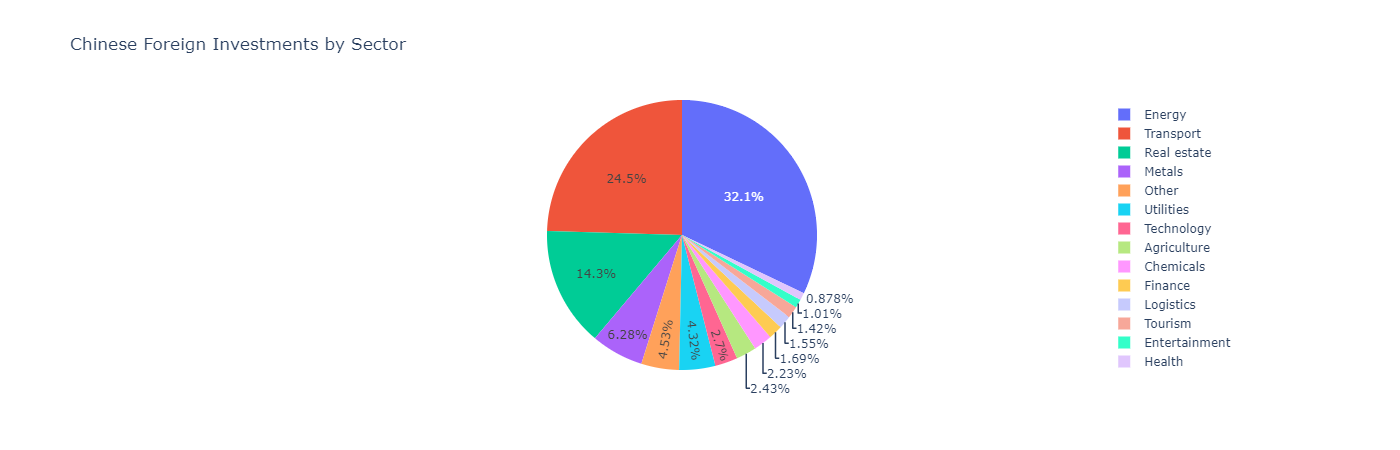

In [184]:
value_counts = bri['Sector'].value_counts()
percent = px.pie(names=value_counts.index, values=value_counts.values, title='Chinese Foreign Investments by Sector')
percent.show()
percent.write_html("1PercentPieSectorBRI.html")

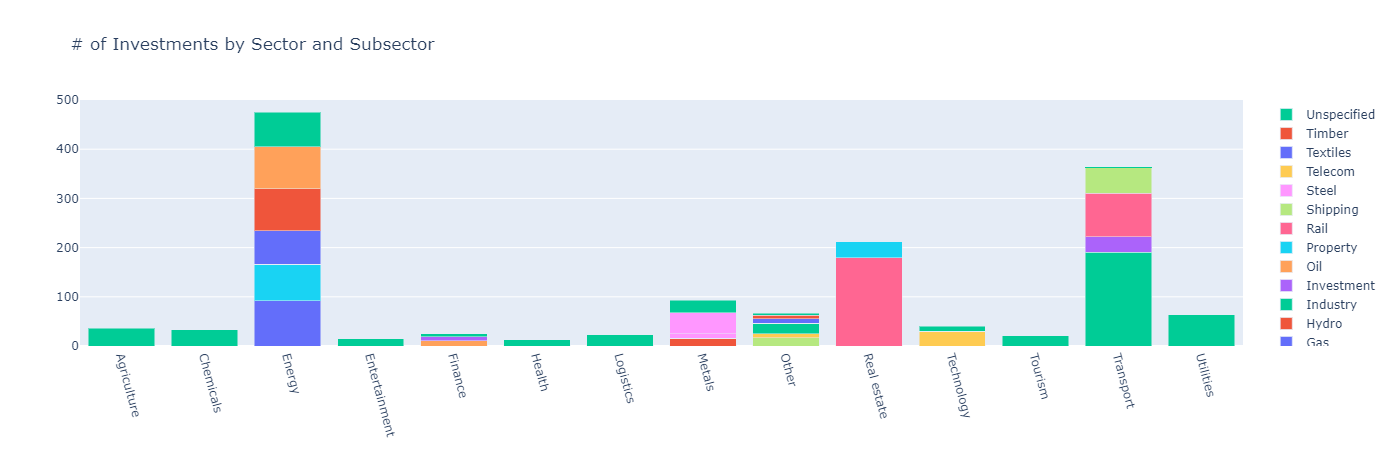

In [185]:
cross = pd.crosstab(bri.Sector, bri.Subsector)
# initiate data list for figure
data = []
#use for loop on every Sector name to create bar data
for x in cross.columns:
   data.append(go.Bar(name=str(x), x=cross.index, y=cross[x]))

sectorbar = go.Figure(data)
sectorbar.update_layout(barmode = 'stack', xaxis_tickangle=75, title='# of Investments by Sector and Subsector')


#For you to take a look at the result use
sectorbar.show()

figure_div = plot(sectorbar,output_type='div')
sectorbar.write_html("2SectorBarChartBRI.html")

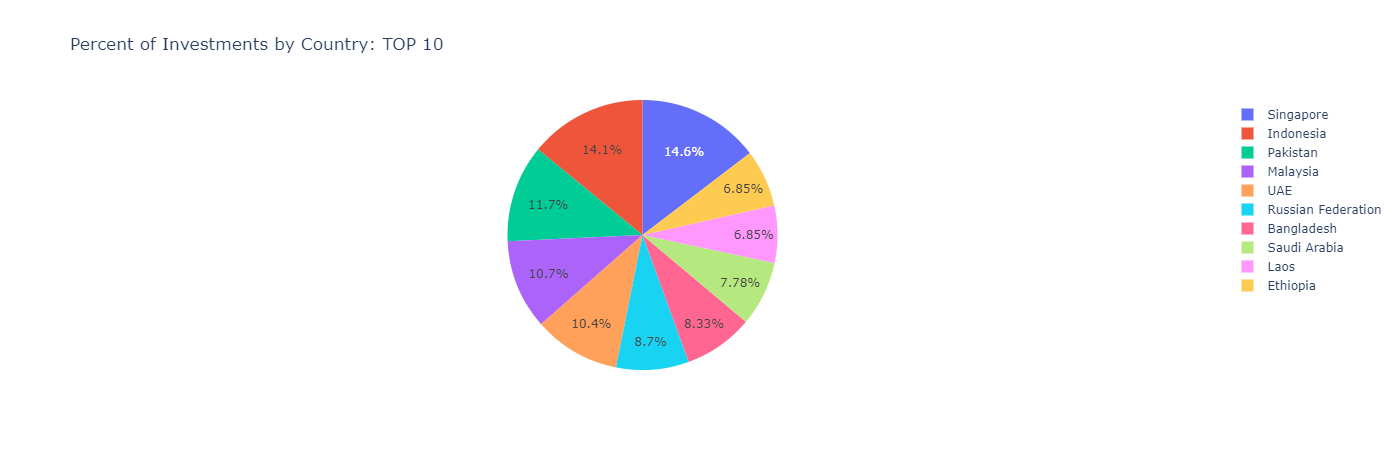

In [186]:
value_counts = bri['Country'].value_counts().head(10)
percent10 = px.pie(names=value_counts.index, values=value_counts.values, title='Percent of Investments by Country: TOP 10')
percent10.show()
percent10.write_html("3PercentPieTop10BRI.html")

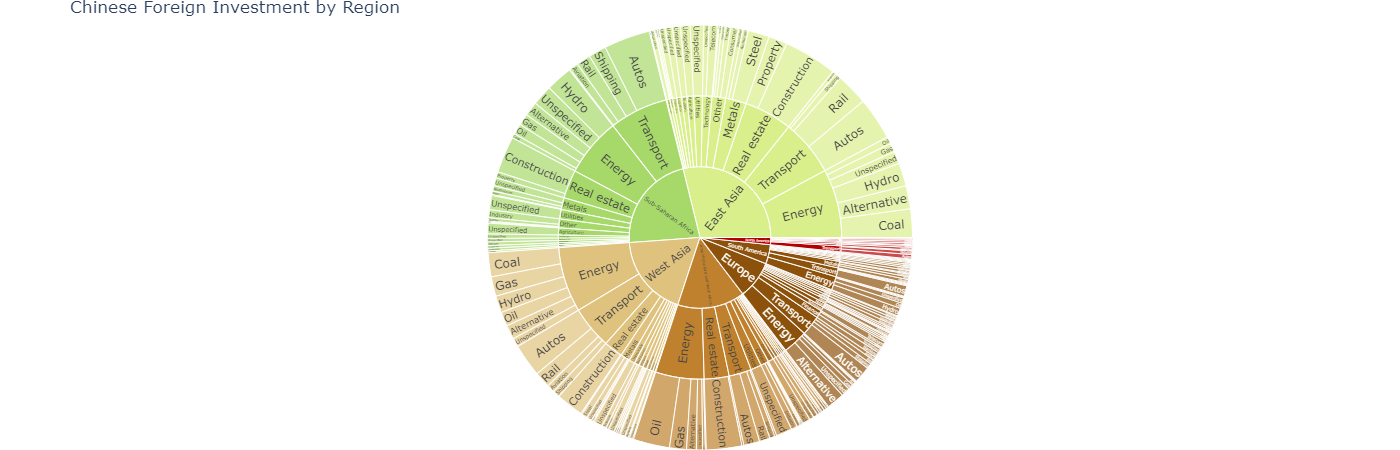

In [187]:
burst = px.sunburst(bri, path=['Region','Sector','Subsector'], values='Investment_Count', color = 'Region',
                  title='Chinese Foreign Investment by Region', color_discrete_map={'Sub-Saharan Africa':'#a6d96a','East Asia':'#d9ef8b','West Asia':'#dfc27d',
                                                                                  'Arab Middle East and North Africa':'#bf812d', 'South America':'#8c510a',
                                                                                  'Europe':'#8c510a', 'North America':'#b30000', 'Australia':'#d7301f'})
burst.update_traces(insidetextorientation='radial')
burst.update_layout(
    grid= dict(columns=4, rows=5),
    margin = dict(t=25, l=0, r=0, b=0)
)
burst.show()
#Crosstab.sum
burst.write_html("4SunburstChart.html")

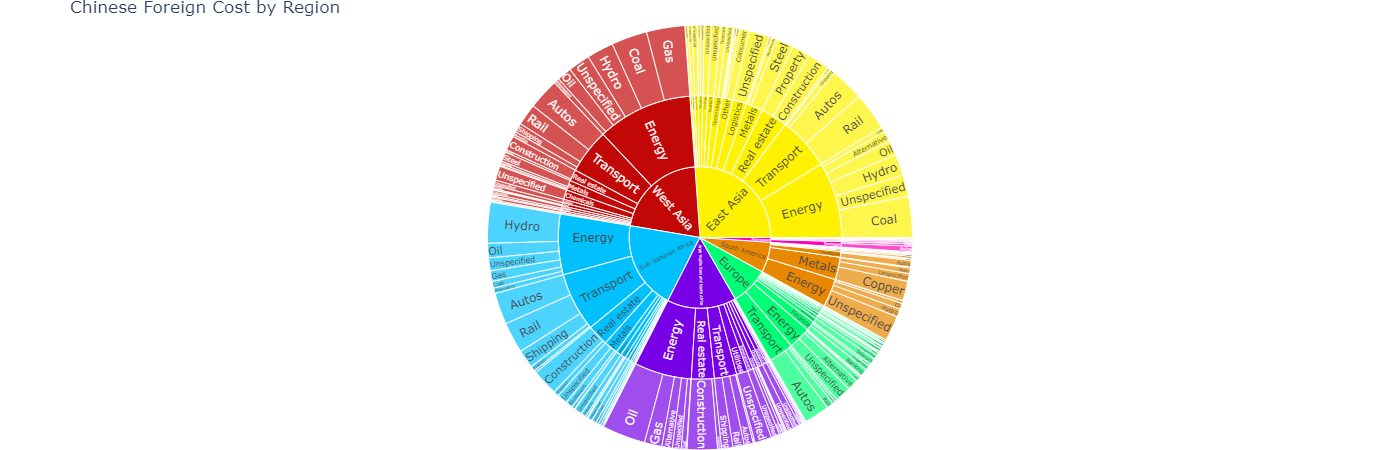

In [188]:
burst = px.sunburst(bri, path=['Region','Sector','Subsector'], values=' Quantity in Millions', color = 'Region',
                  title='Chinese Foreign Cost by Region', color_discrete_map={'Sub-Saharan Africa':'#00C1FE','East Asia':'#FEF200','West Asia':'#C20707',
                                                                                  'Arab Middle East and North Africa':'#7700E7', 'South America':'#E78800',
                                                                                  'Europe':'#00FF74', 'North America':'#FE00B9', 'Australia':'#d7301f'})
burst.update_traces(insidetextorientation='radial')
burst.update_layout(
    grid= dict(columns=4, rows=5),
    margin = dict(t=25, l=0, r=0, b=0)
)
burst.show()
#Crosstab.sum
burst.write_html("4.5SunburstChartBRI.html")

In [189]:
bricounts = bri['Country'].value_counts()

In [190]:
#bricounts.to_csv('bricounts.csv')
bricounts2 = pd.read_csv('bricounts.csv', encoding='latin')

In [191]:
bri = pd.merge(bricounts2, bri, how='outer')

In [192]:
import plotly.graph_objects as go

mappy = go.Figure(data=go.Choropleth(
    locations = bri['Iso_alpha'],
    z = bri['Counts'],
    text = bri['Country'],
    colorscale = 'solar',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = '# of Chinese Investments',
))

mappy.update_layout(
    title_text='Map of Chinese Investments',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Sources: Chinese Bureau of Statistics, Aiddata, AEI, and The Heritage Foundation',
        showarrow = False
    )]
)

mappy.show()

mappy.write_html("5ChineseProjectMapBRI.html")

In [193]:
bri.head()

,Country,Counts,Year,Investment_Totals,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
0,Singapore,79,2013,2,November,Power Construction Corp,150,NaN,NaN,Transport,Rail,East Asia,1,SGP,1
1,Singapore,79,2013,2,November,Yuanda,120,NaN,NaN,Real estate,Construction,East Asia,1,SGP,1
2,Singapore,79,2014,10,September,Shanghai Tunnel Engineering,270,NaN,NaN,Transport,Rail,East Asia,1,SGP,1
3,Singapore,79,2014,10,August,MCC,380,NaN,NaN,Real estate,Property,East Asia,1,SGP,1
4,Singapore,79,2014,10,July,Power Construction Corp,200,50%,Sembcorp,Transport,Rail,East Asia,1,SGP,1


In [194]:
#fgroupby = bri.groupby(['Country', 'Year'], sort=False).sum().groupby(by=['Country']).cumsum().reset_index()
#fgroupby = fgroupby.drop(columns=['Counts', 'BRI']).sort_values(['Country','Year'])
#fgroupby.head()

In [195]:
#bri = pd.merge(fgroupby, bri, how='outer', on=['Country','Year'])
#bri.head()

In [196]:
#bri = bri.rename(columns={'Investment Count_x':'Investment_Totals', 'Investment Count_y':'Investment_Count'})
#bri.head()

In [197]:
bri = bri.sort_values(['Year'])

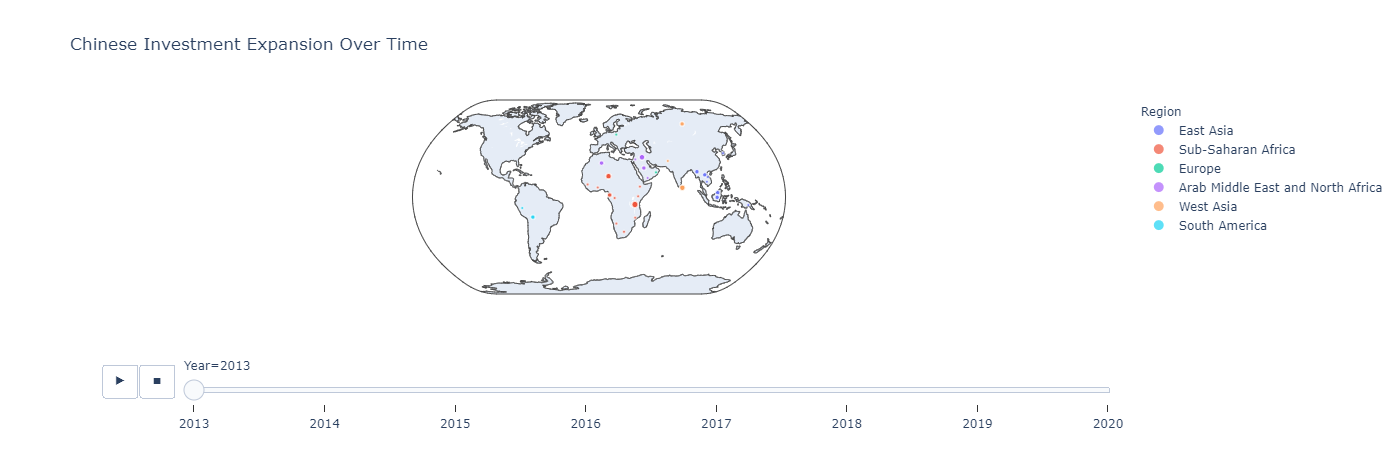

In [198]:
#Dots disappearing is caused by the lack of information for particular years
scatter = px.scatter_geo(bri, locations="Iso_alpha", color="Region",
                     hover_name="Country", animation_frame="Year",
                         size='Investment_Totals',
                     projection="natural earth", title='Chinese Investment Expansion Over Time')
scatter.show()
scatter.write_html("6GeoTimeMapBRI.html")

In [199]:
#bri.to_csv('BRI.csv')

In [200]:
exports = pd.read_excel('ExportsByRegion.xlsx')
imports = pd.read_excel('ImportsByRegion.xlsx')

In [201]:
exports.head()

,Country,Type,Product Group,Indicator,Year,World,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,China,Export,All Products,Export (US$ Thousand),2000,2.492026e+08,1.199806e+08,4.665473e+07,7.090030e+06,7.695540e+06,5.533001e+07,3.796352e+06,3548056.935
1,China,Export,All Products,Export (US$ Thousand),2001,2.660982e+08,1.278821e+08,4.998535e+07,8.107271e+06,8.754939e+06,5.771175e+07,4.221913e+06,4371265.767
2,China,Export,All Products,Export (US$ Thousand),2002,3.255960e+08,1.527810e+08,6.046521e+07,9.321369e+06,1.158681e+07,7.437314e+07,5.444873e+06,4956977.089
3,China,Export,All Products,Export (US$ Thousand),2003,4.382278e+08,1.960510e+08,9.242997e+07,1.158891e+07,1.608817e+07,9.829011e+07,7.191092e+06,7422037.437
4,China,Export,All Products,Export (US$ Thousand),2004,5.933256e+08,2.578997e+08,1.282230e+08,1.795320e+07,2.109644e+07,1.334368e+08,1.123140e+07,9845445.617


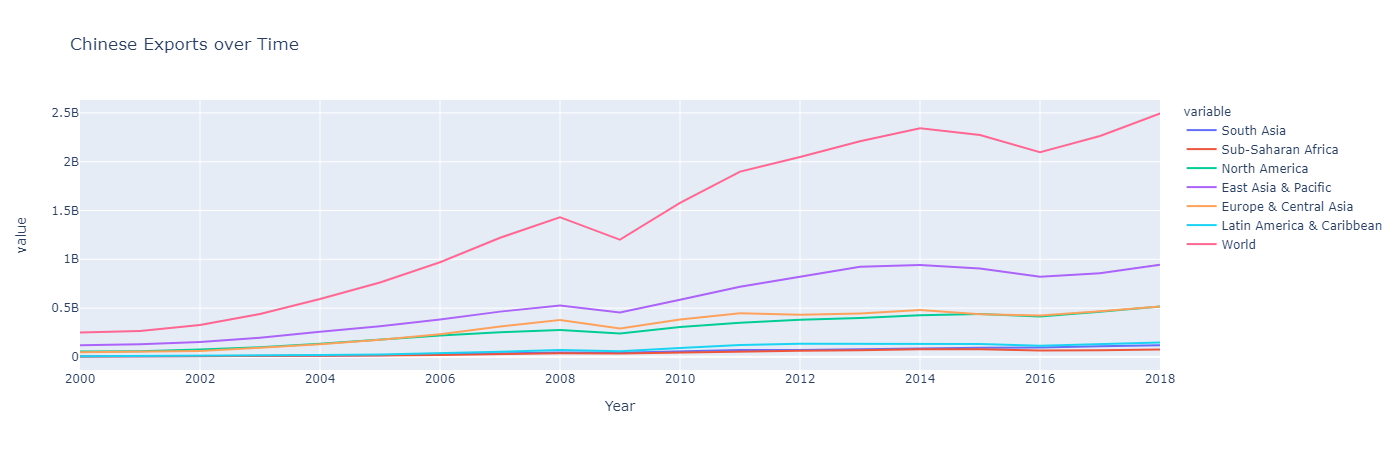

In [202]:
# For overview 
pd.options.plotting.backend = "plotly"
exportsplot = exports.plot(x='Year', y=['South Asia', 'Sub-Saharan Africa',
                          'North America', 'East Asia & Pacific', 'Europe & Central Asia', 
                          'Latin America & Caribbean', 'World' ], title='Chinese Exports over Time')
exportsplot.write_html('OverviewExp.html')
exportsplot.show()

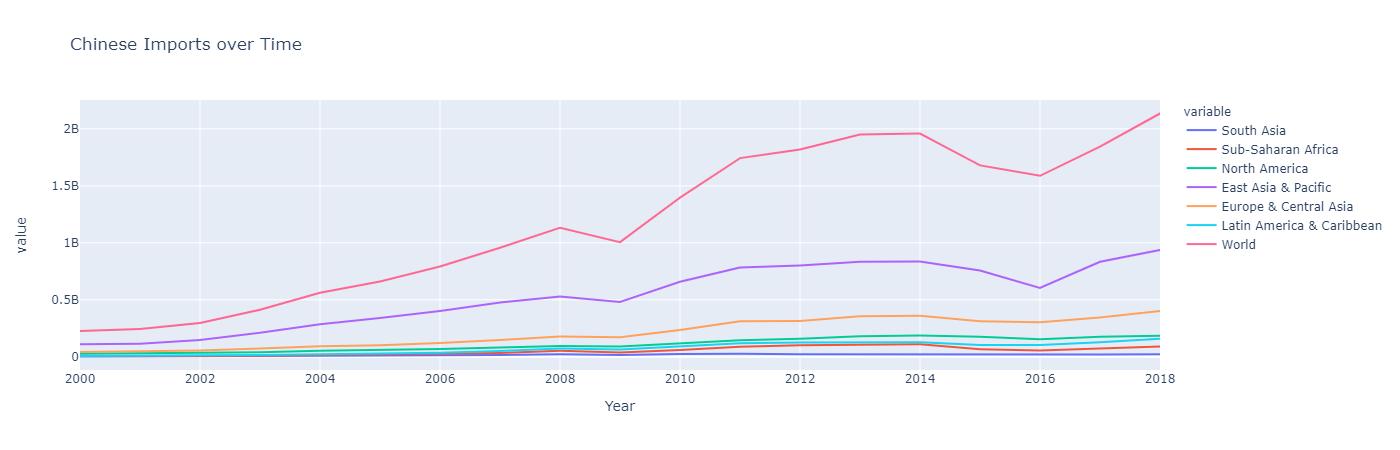

In [203]:
pd.options.plotting.backend = "plotly"
importsplot = imports.plot(x='Year', y=['South Asia', 'Sub-Saharan Africa',
                          'North America', 'East Asia & Pacific', 'Europe & Central Asia', 
                          'Latin America & Caribbean', 'World' ], title='Chinese Imports over Time')
importsplot.write_html('OverviewImp.html')
importsplot.show()

In [204]:
trade = pd.read_excel('ChinaTradeOverview.xlsx')

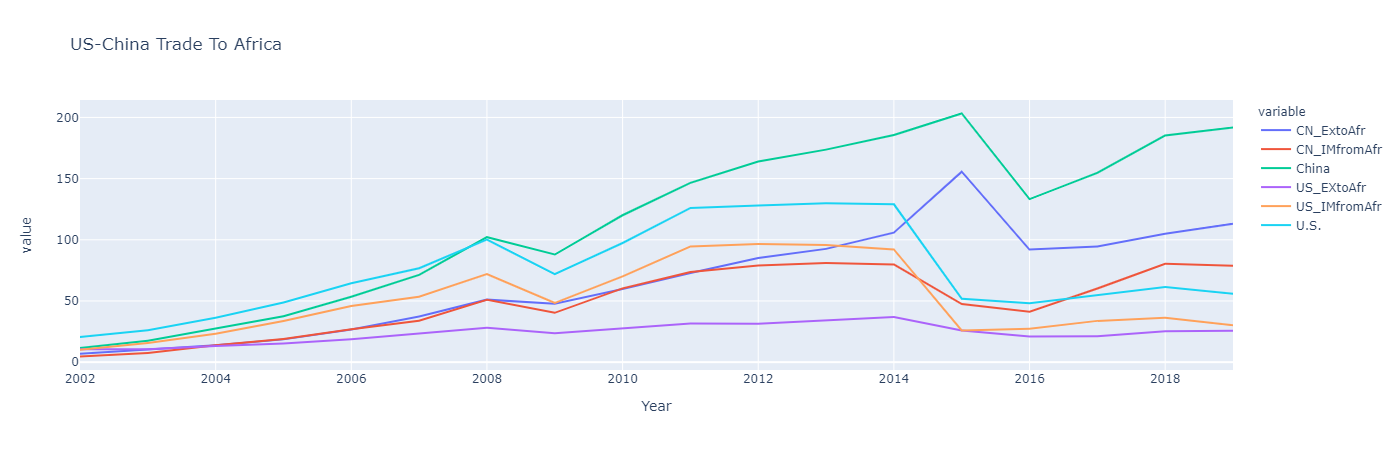

In [205]:
pd.options.plotting.backend = "plotly"
tradeplot = trade.plot(x='Year', y=['CN_ExtoAfr', 'CN_IMfromAfr',
                          'China', 'US_EXtoAfr', 'US_IMfromAfr', 
                          'U.S.'], title='US-China Trade To Africa')
tradeplot.write_html('CountryTrade.html')
tradeplot.show()

In [206]:
bri.sort_values(by='Investment_Totals', ascending=False).head(50)

,Country,Counts,Year,Investment_Totals,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
76,Singapore,79,2020,79,May,Alibaba,600,50%,NaN,Real estate,Property,East Asia,1,SGP,1
78,Singapore,79,2020,79,February,State Construction Engineering,100,70%,JTC,Real estate,Construction,East Asia,1,SGP,1
72,Singapore,79,2020,79,December,State Construction Engineering,180,NaN,NaN,Utilities,Unspecified,East Asia,1,SGP,1
73,Singapore,79,2020,79,August,China National Chemical Engineering,300,NaN,Les Ciments Du Sahel,Real estate,Construction,East Asia,1,SGP,1
74,Singapore,79,2020,79,July,Power Construction Corp,330,NaN,NaN,Utilities,Unspecified,East Asia,1,SGP,1
75,Singapore,79,2020,79,June,China Maple Leaf Educational,490,NaN,Southern Capital and HPEF Capital,Other,Education,East Asia,1,SGP,1
77,Singapore,79,2020,79,April,China Communications Construction,320,31%,NaN,Utilities,Unspecified,East Asia,1,SGP,1
154,Indonesia,76,2020,76,January,Chinalco,520,NaN,Aneka Tambang and Asahan,Metals,Aluminum,East Asia,1,IDN,1
153,Indonesia,76,2020,76,February,Power Construction Corp,780,NaN,NaN,Energy,Hydro,East Asia,1,IDN,1
152,Indonesia,76,2020,76,March,Zhejiang Lygend,530,NaN,NaN,Metals,Steel,East Asia,1,IDN,1


In [303]:
bri['Country'].value_counts().head(10)

Singapore             79
Indonesia             76
Pakistan              63
Malaysia              58
UAE                   56
Russian Federation    47
Bangladesh            45
Saudi Arabia          42
Laos                  37
Ethiopia              37
Name: Country, dtype: int64

In [304]:
top10 = bri[bri['Country'].isin(['Singapore', 'Indonesia', 'Pakistan', 'Malaysia', 'UAE',
                         'Russian Federation', 'Bangladesh', 'Saudi Arabia', 'Laos', 'Ethiopia'])]

In [305]:
top10['Country'].value_counts()

Singapore             79
Indonesia             76
Pakistan              63
Malaysia              58
UAE                   56
Russian Federation    47
Bangladesh            45
Saudi Arabia          42
Ethiopia              37
Laos                  37
Name: Country, dtype: int64

In [306]:
top10.head()

,Country,Counts,Year,Investment_Totals,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
0,Singapore,79,2013,2,November,Power Construction Corp,150,NaN,NaN,Transport,Rail,East Asia,1,SGP,1
503,Ethiopia,37,2013,1,December,"China Railway Construction, China Railway Engi...",2460,NaN,NaN,Transport,Rail,Sub-Saharan Africa,1,ETH,1
467,Laos,37,2013,2,December,Norinco,180,85%,Electricite du Laos,Energy,Hydro,East Asia,1,LAO,1
466,Laos,37,2013,2,October,Southern Power,300,NaN,NaN,Energy,Unspecified,East Asia,1,LAO,1
425,Saudi Arabia,42,2013,2,December,SEPCO II,1720,70%,Al-Arrab,Energy,Unspecified,Arab Middle East and North Africa,1,SAU,1


In [307]:
top10.groupby('Country').count().reset_index()

,Country,Counts,Year,Investment_Totals,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
0,Bangladesh,45,45,45,45,45,45,8,15,45,45,45,45,45,45
1,Ethiopia,37,37,37,37,37,37,3,6,37,37,37,37,37,37
2,Indonesia,76,76,76,76,76,76,20,40,76,76,76,76,76,76
3,Laos,37,37,37,37,37,37,10,10,37,37,37,37,37,37
4,Malaysia,58,58,58,58,58,58,20,20,58,58,58,58,58,58
5,Pakistan,63,63,63,63,63,63,14,23,63,63,63,63,63,63
6,Russian Federation,47,47,47,47,47,47,17,30,47,47,47,47,47,47
7,Saudi Arabia,42,42,42,42,42,42,2,25,42,42,42,42,42,42
8,Singapore,79,79,79,79,79,79,26,30,79,79,79,79,79,79
9,UAE,56,56,56,56,56,56,7,28,56,56,56,56,56,56


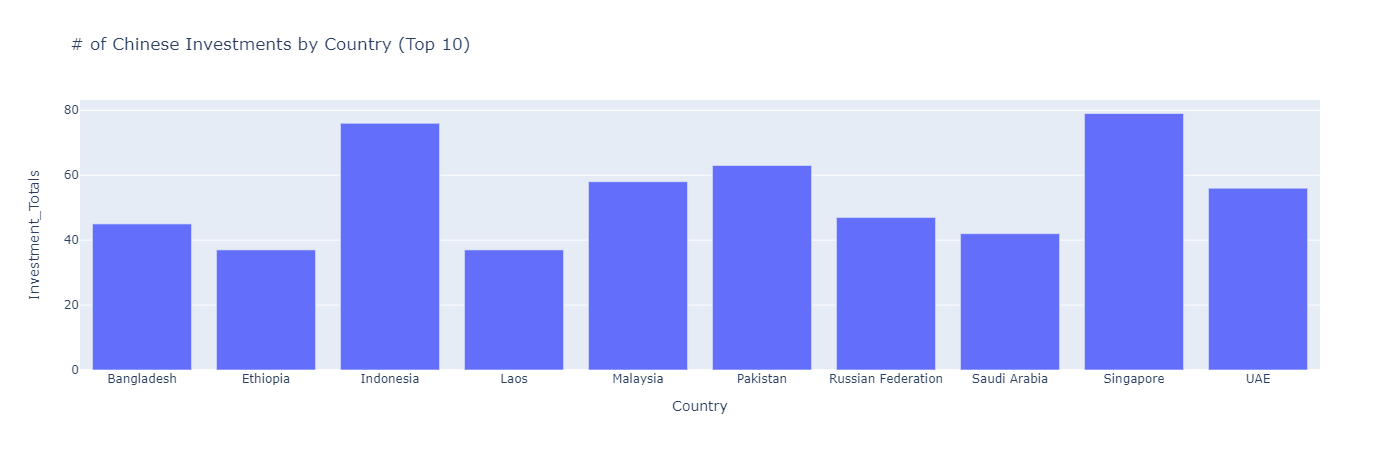

In [311]:
dfg=top10.groupby('Country').count().reset_index()
#dfg=dfg.rename(columns={"User": "Users"})

# plot structure
topbar = px.bar(dfg,
             x='Country',
             y='Investment_Totals',
             title='# of Chinese Investments by Country (Top 10)',
             #color='Items',
             barmode='stack')
topbar.write_html('CountryTrade.html')
# plot
topbar.show()

In [312]:
top3 = bri[bri['Country'].isin(['Singapore'])]

In [313]:
top3.head()

,Country,Counts,Year,Investment_Totals,Month,Chinese Entity,Quantity in Millions,Share size,Transaction Party,Sector,Subsector,Region,BRI,Iso_alpha,Investment_Count
0,Singapore,79,2013,2,November,Power Construction Corp,150,NaN,NaN,Transport,Rail,East Asia,1,SGP,1
1,Singapore,79,2013,2,November,Yuanda,120,NaN,NaN,Real estate,Construction,East Asia,1,SGP,1
7,Singapore,79,2014,10,May,Alibaba,210,10%,Singapore Post,Logistics,Unspecified,East Asia,1,SGP,1
6,Singapore,79,2014,10,May,Shanghai Shentong,290,NaN,NaN,Transport,Rail,East Asia,1,SGP,1
8,Singapore,79,2014,10,February,"Bank of China, China Life, Hopu Investment",160,2%,Global Logistics Properties,Logistics,Unspecified,East Asia,1,SGP,1


In [314]:
top3 = top3.groupby(['Country', 'Year', 'Counts', 'Investment_Totals', 'BRI'], sort=False).sum().groupby(by=['Country']).cumsum().reset_index()

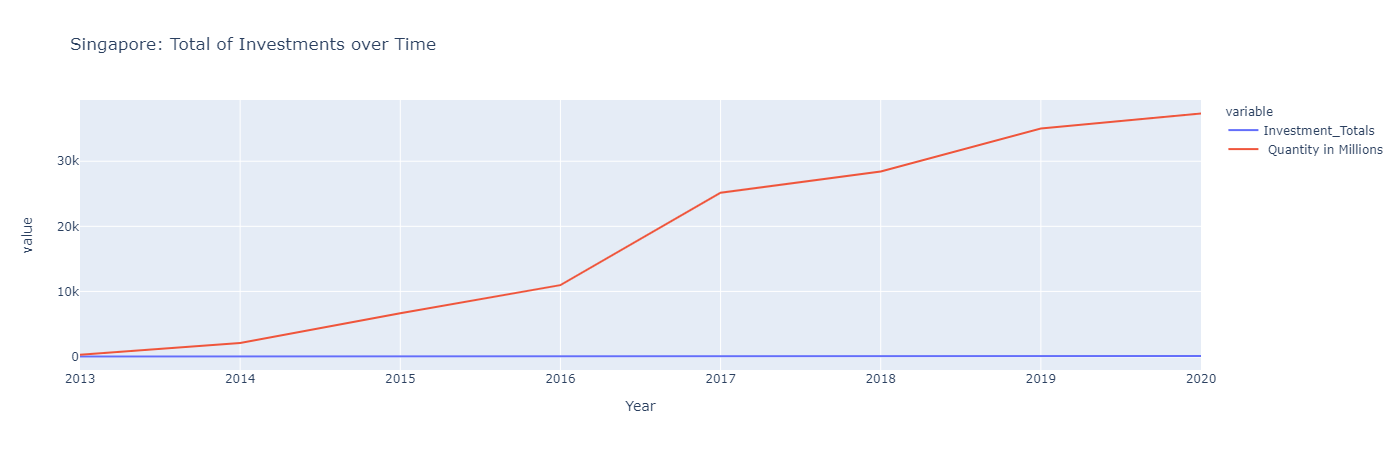

In [315]:
pd.options.plotting.backend = "plotly"
top3plot = top3.plot(x='Year', y=['Investment_Totals', ' Quantity in Millions'], title='Singapore: Total of Investments over Time')
top3plot.write_html('top3plot.html')
top3plot.show()

In [321]:
top10scatter = top10.groupby(['Country', 'Year', 'Investment_Totals'], sort=False).sum().groupby(by=['Country']).cumsum().reset_index()

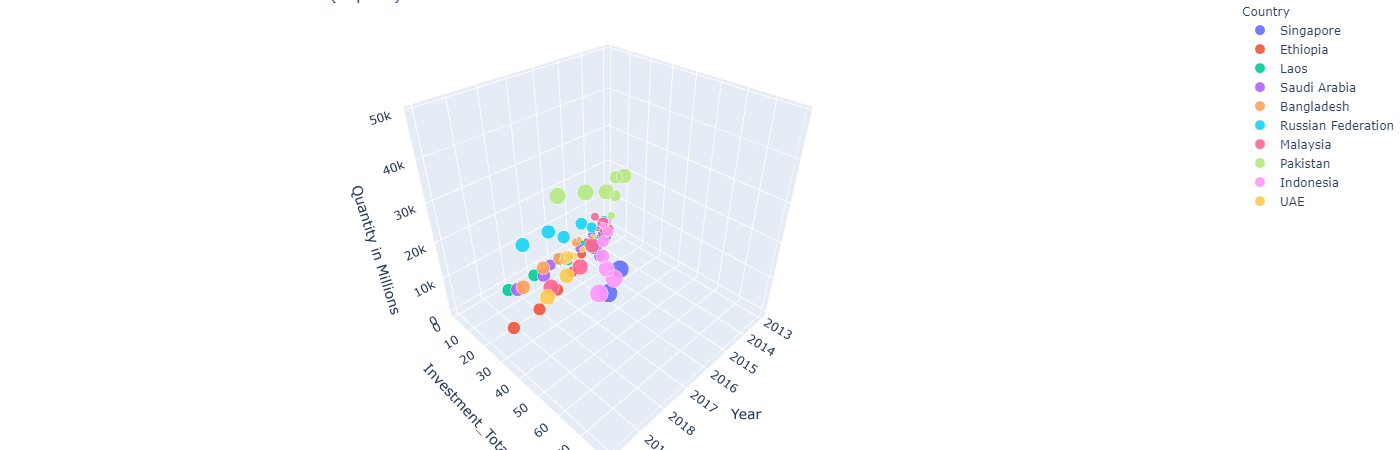

In [325]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(top10scatter, x='Year', y='Investment_Totals', z=' Quantity in Millions',
              color='Country', size='Investment_Count', title='Investment Values Over Time (Top 10) ', size_max=30,
               opacity=0.9)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.write_html('top10scatter.html')
fig.show()

In [284]:
chinaafr = pd.read_excel('TradeData_China2.xlsx')

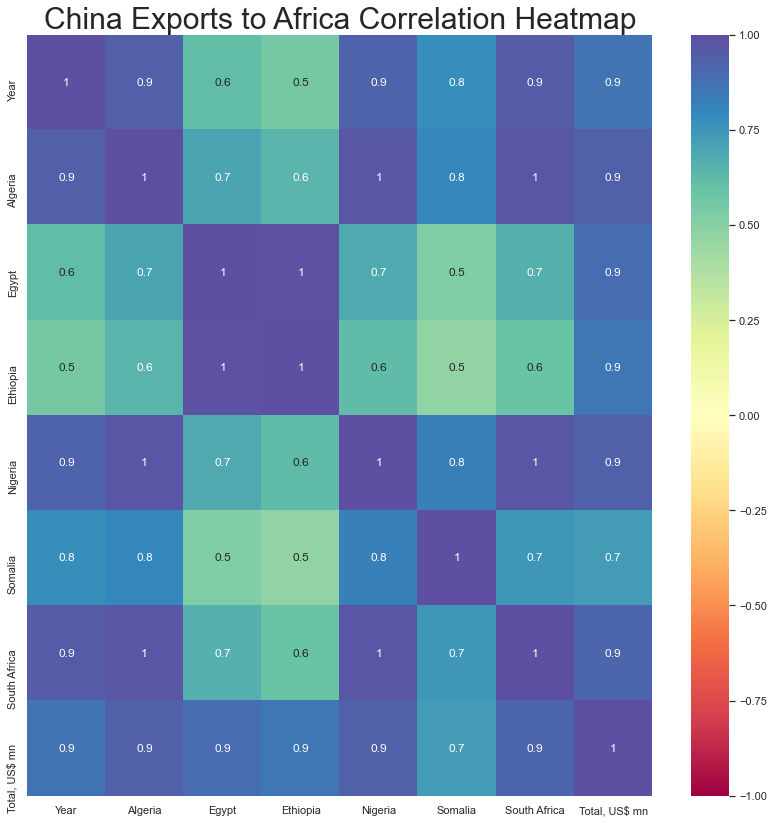

In [300]:
sns.set(rc={'figure.figsize':(14,14)})
sns1_plot= sns.heatmap(chinaafr.corr(), annot = True, vmin=-1, vmax=1, center= 0,fmt='.1g', cmap='Spectral')
plt.title("China Exports to Africa Correlation Heatmap", fontsize =30)
sns1_plot.figure.savefig("China Exports to Africa Correlation Heatmap.png")

In [281]:
uschinaafr = pd.read_excel('TradeData_China3.xlsx')

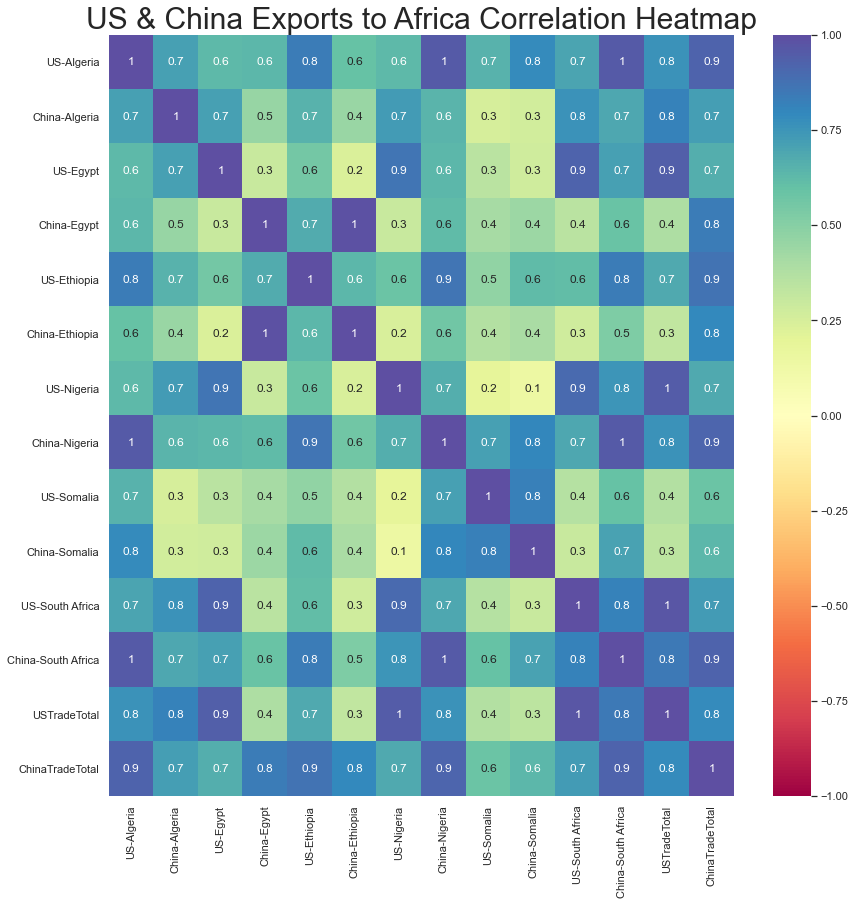

In [299]:
sns.set(rc={'figure.figsize':(14,14)})
sns2_plot=sns.heatmap(tradedata.corr(), annot = True, vmin=-1, vmax=1, center= 0,fmt='.1g', cmap='Spectral')
plt.title("US & China Exports to Africa Correlation Heatmap", fontsize =30)
sns2_plot.figure.savefig("US & China Exports to Africa Correlation Heatmap.png")

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.1.post1
atomicwrites==1.4.0
attrs==19.3.0
autopep8 @ file:///tmp/build/80754af9/autopep8_1592412889138/work
Babel==2.8.0
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.9.1
bitarray @ file:///C:/ci/bitarray_1594751093906/work
bkcharts==0.2
bleach==3.1.5
bokeh @ file:///C:/ci/bokeh_1593178781838/work
boto==2.49.0
Bottleneck==1.3.2
branca==0.4.1
brotlipy==0.7.0
bs4==0.0.1
certifi==2020.6.20
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle @ file:///tmp/build/80754af9/cloudpickle_1594141588948/work
clyent==1.2.2
colorama==0.4.3
colorlover==0.3.0
comtypes==1.1.7
conda==4.9.2
conda-build==3.18.11
conda-package-handling==1.7.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cov